In [1]:
import numpy as np

In [3]:
A = np.array([[11,12,13,14],[15,16,17,18]])

In [11]:
#leat squares y ~= ax + b
#input data

x = np.array([0,1,2,3])  
#x는 키에 해당하는 4명의 키 값(linear regression)

y = np.array([-1,0.2,0.9,2.1])
#y는 그 떄 해당하는 target value(수명의 값)

#y = Ax + b라는 식으로 구성하게 됨

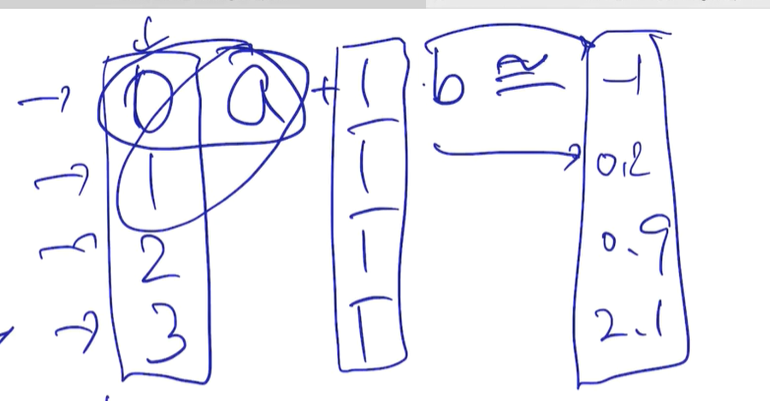

1이라고 하는 더미 상수 벡터를 모든 data sample에 추가해줌

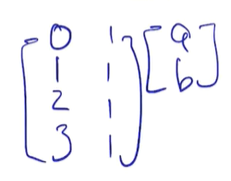

In [5]:
#concatnate a constant term
#위의 작업 수행
A = np.vstack([x, np.ones(len(x))]).T
A

#y = Ax + b에서의 matrix A가 구해짐

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [9]:
#create a matrix A'*A
At_A = A.T.dot(A)
At_A

#normal equation    A transpose A

array([[14.,  6.],
       [ 6.,  4.]])

In [12]:
#create a vector A'*b
At_y = A.T.dot(y)
At_y

#이 식에서 주어진 상수값(b)이 y에 해당하는 벡터

array([8.3, 2.2])

In [14]:
#solve for x
from numpy.linalg import solve
c = solve(At_A, At_y)
c

#At_A가 coefficient matrix가 되고, At_y가 b벡터인 방정식
#solve라는 function으로 풀면 c가 y = Ax + b에서 A와 b라는 가중치값을 가지는 벡터

array([ 1.  , -0.95])

In [19]:
#fitted value
y_fitted = A.dot(c)
y_fitted

#에러가 얼마나 났는가
#최적의 solution을 실제 갖고있는 data에 적용해봄

array([-0.95,  0.05,  1.05,  2.05])

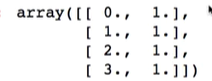

feature벡터에 column 벡터(c)를 곱해 모델에서 만들 수 있었던 target value의 최소 에러를 내는 모델의 output



값과 비교

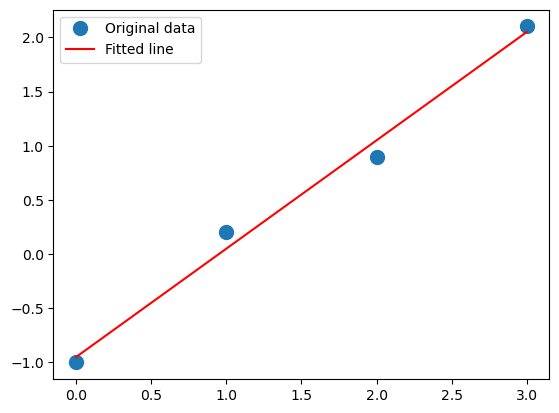

In [17]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label = 'Original data', markersize = 10)
plt.plot(x, y_fitted, 'r', label = 'Fitted line')
plt.legend()
plt.show()

x값은 키 값 (0~3)

y값은 target value의 값

y값을 Ax + b로 fitting 기울기와 y절편을 토대로 그려진 line

모델의 output과 실제로 주어진 b와의 에러는 점과 line의 수직성분 차이

In [20]:
#compute error vector
error = y - y_fitted
error

#실제 에러값 (실제 target factor인 y와 실제 fitted값의 차이)

array([-0.05,  0.15, -0.15,  0.05])

In [21]:
#calculate error
np.sqrt(np.sum(error**2))

#에러를 다 제곱 후 합쳐 루트를 취함
#어떤 coefficient값인 c를 사용하더라도 이 error값보다 낮아질 수 없다
#최소의 에러값

0.22360679774997896

In [22]:
#calculate error using 'norm' function
from numpy.linalg import norm
norm(y-y_fitted)

#norm으로 바로 구하기

0.22360679774997896

linear regression 시 gradient descent를 통해 최적의 solution을 찾아가는 방식

normal equation을 사용하는 방법

normal equation으로 풀리는 linear regression의 경우 analytic solution이 있다  (구하고자 하는 solution값이 공식에 대입하면 나오는 형태

ex)2차 방정식의 경우 해당하는 근의 공식을 통해 구할 수 있음

해에 대한 공식이 주어진 형태의 문제는 analytic solution이 있다

linear regression / least square의 경우 analytic solution이 normal equation의 형태로 공식이 존재

solution이 없는 경우 objective function을 미분해 gradient descent를 통해 최적의 값으로 점진적으로 가까워지도록 반복 작업 필요

단, gradient descent에 비해 복잡한 계산량을 가짐(역함수)

normal eq가 마냥 좋은 것은 아닌 이유

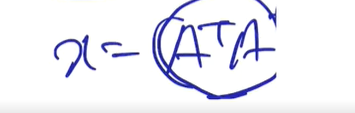

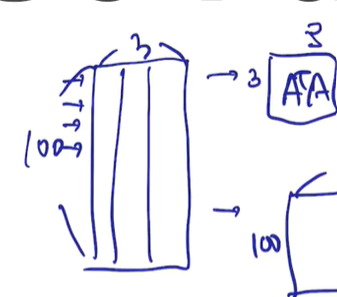

100명의 인원으로부터 얻은 3개의 feature의 경우 간단하게 나타낼 수 있지만

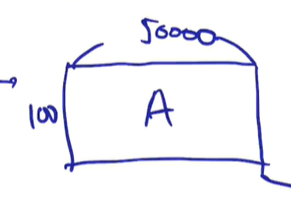
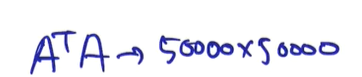

feature가 더 많은 경우 더 복잡해질 수 있다


이 경우 QR factorization을 활용해 50000x50000 matrix를 만들지 않고 효율적으로 풀어낼 수 있다